# Benchmarking HOTRG code against Gu, Wen (2009)
Paper: https://arxiv.org/pdf/0903.1069


In [1]:
using TensorKit 
using JLD
include("./tebd.jl");
include("trotter_sukuzi.jl");
include("quantum_hamiltonians.jl")
include("./rg.jl")
include("./lntrg.jl")
include("./hotrg2d.jl")

HOTRG_2D_trunc_y (generic function with 1 method)

In [65]:
# Prepare tensors for B=0
χ = 20
M = 24 # δt = 1/18
δt = 1/M 
for U in range(-1,2,31)
    norms = Vector{ComplexF64}()
    @show U 
    ℍ = SPT_Chain(;B=0,U=U,symmetry=:Z2)
    𝕌 = exp(-δt*ℍ)
    push!(norms,norm(𝕌))
    for i in range(1,M-1) # Do 1 less because when M = 1, we should not compress in time direction 
        𝕌 =Gu_ITEBD_Step_Trunc_First(𝕌,χ)
        push!(norms,norm(𝕌))
        𝕌 /= norm(𝕌)
    end
    filename = "./SPT Chain Init Tensors/B=0 scan/T0-sym_Z2-B_0-U_$U-χ_$χ-M_$M.jld"
    save(filename,"T0",𝕌,"U",U,"χ",χ,"M",M,"δt",δt,"norms",norms)
end

In [3]:
load("./SPT Chain Init Tensors/B=0 scan/T0_B_0_U_-1.0.jld")

Dict{String, Any} with 6 entries:
  "δt"    => 0.05
  "U"     => -1.0
  "M"     => 20
  "T0"    => TensorMap((ℂ^10 ⊗ ℂ^10 ⊗ (ℂ^10)' ⊗ (ℂ^10)') ← ProductSpace{Complex…
  "norms" => ComplexF64[3.11305+0.0im, 3.51628+0.0im, 0.139099+0.0im, 0.20694+0…
  "χ"     => 10

In [4]:
init_data = load("./SPT Chain Init Tensors/B=0 scan/T0-B_0-U_-1.0-χ_35-M_18.jld")

Dict{String, Any} with 6 entries:
  "δt"    => 0.0555556
  "U"     => -1.0
  "M"     => 18
  "T0"    => TensorMap((ℂ^35 ⊗ ℂ^35 ⊗ (ℂ^35)' ⊗ (ℂ^35)') ← ProductSpace{Complex…
  "norms" => ComplexF64[3.12731+0.0im, 3.62219+0.0im, 0.165584+0.0im, 0.206243+…
  "χ"     => 35

In [66]:
χ = 20
U = -1.0
RG_steps = 22 
M = 24
for U in range(-1,2,31)
    @show U 
    init_data = load("./SPT Chain Init Tensors/B=0 scan/T0-sym_Z2-B_0-U_$U-χ_20-M_$M.jld")
    T0 = init_data["T0"]
    T_fp = HOTRG2D_renormalize(;T=T0,χ=χ,steps=RG_steps)
    if abs(norm(T_fp)-1.0) > 1e-5
        throw("Something is not right about the final tensor ")
    end
    filename = "./SPT Fix Point Tensor/fixed_point_steps-HOTRG2D-Z2-M-$M-steps-$RG_steps-χ0_20-χ-$χ-B_0-U-$U.jld"
    save(filename,"T",T_fp,"χ",χ,"RG steps",RG_steps,"params",Dict("B"=>0,"U"=>U))
end

UndefVarError: UndefVarError: `filename` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name may be made accessible by importing FileIO in the current active module Main

In [3]:
include("looptrg.jl")

get_R (generic function with 3 methods)

In [13]:
# U = 0.9
χ = 20
init_data = load("./SPT Chain Init Tensors/B=0 scan/T0-sym_Z2-B_0-U_-0.9-χ_20-M_18.jld")
T0 = init_data["T0"]
@show space(T0)
T = HOTRG2D_renormalize(;T=T0,χ=χ,steps=30)
#Ta,Tb = entanglement_filtering(T0,T0)
#Ta = permute(Ta,(1,2,4,3))
#Tb = permute(Tb,(1,2,4,3))

space(T0) = (Rep[ℤ₂](0=>10, 1=>10) ⊗ Rep[ℤ₂](0=>10, 1=>10) ⊗ Rep[ℤ₂](0=>10, 1=>10)' ⊗ Rep[ℤ₂](0=>10, 1=>10)') ← ProductSpace{GradedSpace{Z2Irrep, Tuple{Int64, Int64}}, 0}()


TensorMap((Rep[ℤ₂](0=>19, 1=>1) ⊗ Rep[ℤ₂](0=>9, 1=>11) ⊗ Rep[ℤ₂](0=>19, 1=>1)' ⊗ Rep[ℤ₂](0=>9, 1=>11)') ← ProductSpace{GradedSpace{Z2Irrep, Tuple{Int64, Int64}}, 0}()):
* Data for sector (Irrep[ℤ₂](1), Irrep[ℤ₂](0), Irrep[ℤ₂](1), Irrep[ℤ₂](0)) ← ():
[:, :, 1, 1] =
 0.3535533905932736 + 0.0im  …  -3.345801084348537e-31 + 0.0im

[:, :, 1, 2] =
 -2.935773577641539e-17 + 0.0im  …  2.778226621725324e-47 + 0.0im

[:, :, 1, 3] =
 7.014297735295886e-17 + 0.0im  …  -6.637878632507434e-47 + 0.0im

[:, :, 1, 4] =
 -4.617544097352835e-17 + 0.0im  …  4.369745690184365e-47 + 0.0im

[:, :, 1, 5] =
 -1.6971443605900933e-17 + 0.0im  …  1.6060678791483121e-47 + 0.0im

[:, :, 1, 6] =
 2.8100036408265524e-17 + 0.0im  …  -2.65920607145768e-47 + 0.0im

[:, :, 1, 7] =
 -6.9926415575725e-18 + 0.0im  …  6.617384623727554e-48 + 0.0im

[:, :, 1, 8] =
 -3.466280913061418e-31 + 0.0im  …  3.280264521892035e-61 + 0.0im

[:, :, 1, 9] =
 -3.8772423617789895e-31 + 0.0im  …  3.6691719110808125e-61 + 0.0im
* Data for sec

In [27]:
norm(T)

1.000000000000001

In [102]:
using LinearAlgebra

In [57]:
function Z1(T::TensorMap)
    @tensor TrT = T[i,j,i,j]
    @tensor TrT2 = T[i,m,i,n]*T[k,n,k,m]
    return TrT2 / TrT^2
end 

function Z2(T::TensorMap)
    @tensor TrT = T[i,j,i,j]
    @tensor TrT2 = T[i,m,k,n]*T[k,n,i,m]
    return TrT2/TrT^2
end

function λsum(T::TensorMap)
    _,Σ,_,_ = tsvd(T,(3,4),(1,2))
    λ_max = 0
    sums = 0
    for irrep in blocksectors(Σ)
        mat = diag(block(Σ,irrep))
        if maximum(mat) > λ_max
            λ_max = maximum(mat)
        end
        sums += sum(mat)
    end
    return sums /λ_max
end

λsum (generic function with 1 method)

In [67]:
fixed_points = Vector{TensorMap}()
for U in range(-1,2,31)
    filename = "./SPT Fix Point Tensor/fixed_point_steps-HOTRG2D-Z2-M-$M-steps-$RG_steps-χ0_20-χ-$χ-B_0-U-$U.jld"
    result = load(filename)
    #T_fp = result["RG layers"].layers[end].T
    T_fp = result["T"]
    push!(fixed_points,T_fp)
end


In [52]:
RG_steps 

50

In [111]:
_,S,_,_ = tsvd(fixed_points[1],(1,2),(3,4))
S

TensorMap(ℂ^1225 ← ℂ^1225):
 0.6617552558687637  0.0                 …  0.0
 0.0                 0.4695929838488922     0.0
 0.0                 0.0                    0.0
 0.0                 0.0                    0.0
 0.0                 0.0                    0.0
 0.0                 0.0                 …  0.0
 0.0                 0.0                    0.0
 0.0                 0.0                    0.0
 0.0                 0.0                    0.0
 0.0                 0.0                    0.0
 ⋮                                       ⋱  
 0.0                 0.0                    0.0
 0.0                 0.0                    0.0
 0.0                 0.0                    0.0
 0.0                 0.0                    0.0
 0.0                 0.0                 …  0.0
 0.0                 0.0                    0.0
 0.0                 0.0                    0.0
 0.0                 0.0                    0.0
 0.0                 0.0                    3.976789618278991e-

In [75]:
#fixed_points[1]

In [20]:
using Plots 

In [37]:
_,Σ,_,_ = tsvd(fixed_points[end],(1,2),(3,4));
for irrep in blocksectors(Σ)
    print(maximum(block(Σ,irrep)))
end

In [41]:
maximum(block(Σ,Z2Irrep(1)))

5.600031410235167e-169

In [62]:
for i in range(1,length(fixed_points))
    @show norm(fixed_points[i])
end

In [119]:
norm(fixed_points[1])

1.0000000000000016

In [61]:
RG_steps

22

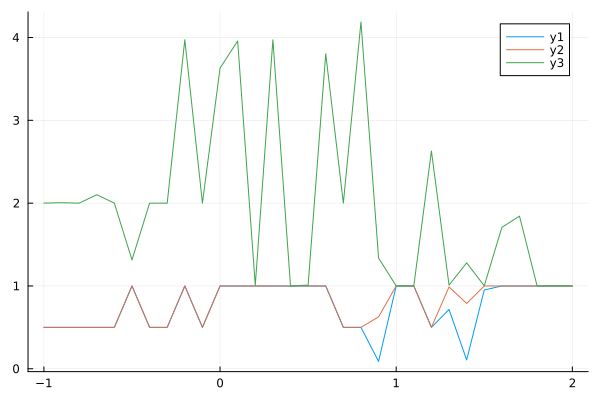

In [68]:
Us = [U for U in range(-1,2,31)]
Z1s = real.(Z1.(fixed_points))
Z2s = real.(Z2.(fixed_points))
λsums = real.(λsum.(fixed_points));
plot(Us,Z1s)
plot!(Us,Z2s)
plot!(Us,λsums)

In [34]:
for i in range(1,length(fixed_points))
    T = fixed_points[i]
    @tensor TrT = T[i,j,i,j]
    @tensor TrT2 = T[i,m,k,n]*T[k,n,i,m]
    if real(TrT2/(TrT^2))>10 
        @show i
        @show TrT 
        @show TrT2 
        @show norm(TrT)
        @show real(TrT2/(TrT^2))
    end
end

i = 1
TrT = 0.22592613050954774 + 0.0im
TrT2 = 0.9629800785030458 + 0.0im
norm(TrT) = 0.22592613050954774
real(TrT2 / TrT ^ 2) = 18.866197415695368
i = 20
TrT = -2.090584371381773e-12 + 0.0im
TrT2 = 0.2107446719172401 + 0.0im
norm(TrT) = 2.090584371381773e-12
real(TrT2 / TrT ^ 2) = 4.82193336728741e22
i = 22
TrT = 0.04036857351695608 + 0.0im
TrT2 = 0.2548597721732372 + 0.0im
norm(TrT) = 0.04036857351695608
real(TrT2 / TrT ^ 2) = 156.39198215542663


In [ ]:
for i in range(1,length(fixed_points))
    T = fixed_points[i]
    @tensor TrT2 = T[i,m,k,n]*T[k,n,i,m]
    @show TrT2
end